# 신경망

퍼셉트론
- 좋은 소식 : 퍼셉트론으로 복잡한 함수도 표현할 수 있다.(이론상 2층 퍼셉트론과 비선형 시그모이드 함수를 활성화 함수로 이용하면 임의의 함수를 표현할 수 있다.) 이론상, 컴퓨터가 수행하는 복잡한 처리도 퍼셉트론으로 표현할 수 있다.
- 나쁜 소식 : 원하는 결과를 출력하도록 가중치 값을 적절히 정하는 작업을 사람이 수동으로 해야 한다.

신경망
- 가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력이 있다!!!!!

## 3.1. 퍼셉트론에서 신경망으로

- b(편향) : 뉴런이 얼마나 쉽게 활성화 될 것인지를 제어
- w1, w2, ...(가중치) : 각 신호의 영향력

$y=\begin{cases}0&(b+w_1x_1+w_2x_2 <= 0)\\1&(b+w_1x_1+w_2x_2 > 0)\end{cases}$ 

-> $y=h(b+w_1x_1+w_2x_2)$, $h(x)=\begin{cases}0&(x <= 0)\\1&(x > 0)\end{cases}$

-> $h(x)$ 는 입력 신호의 총합을 출력신호로 변환해주는 함수 = 활성화 함수

### 3.1.3. 활성화 함수의 등장

$a = b + w_1x_1 + w_2x_2$

$y = h(a)$

## 3.2. 활성화 함수

- 임계값을 경계로 출력이 바뀌는 함수를 '계단 함수'라 한다.(위의 h(x))
- 퍼셉트론에서는 활성화 함수로 계단 함수를 이용했다.
- 계단 함수가 아닌 다른 함수를 활성화 함수로 사용할 수도 있나? 
   
   -> Yes! 활성화 함수를 계단 함수가 아닌 다름 함수로 바꾸는 것이 신경망 세계로 나아가는 열쇠!

### 3.2.1. 시그모이드 함수

$h(x)=\frac{1}{1+exp(-x)}$

복잡해 보이지만, 입력을 출력으로 돌려주는 변환기!

### 3.2.2. 계단 함수 구현하기

In [1]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [2]:
# numpy로 표현
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [5]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
y = x > 0
y

array([False,  True,  True])

In [8]:
y = y.astype(np.int32)
y

array([0, 1, 1], dtype=int32)

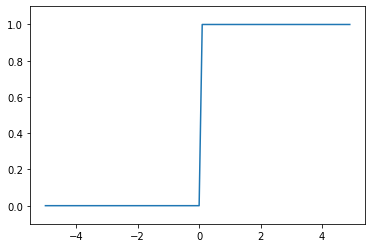

In [1]:
# 계단 함수 그래프
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int32)
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y 축 범위 지정
plt.show()

### 3.2.4. 시그모이드 함수 구현하기

In [2]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [3]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [7]:
# 브로드캐스팅 기능
t = np.array([1.0, 2.0, 3.0])
print(1.0 + t)
print(1.0 / t)

[2. 3. 4.]
[1.         0.5        0.33333333]


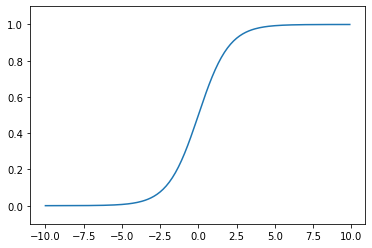

In [11]:
# 그래프 그리기
x = np.arange(-10.0, 10.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

계단 함수와 시그모이드 비교
- 차이점
    - 시그모이드는 곡선(매끈함), 계단함수는 0을 경계로 출려이 갑자기 변함
    - 퍼셉트론에서는 뉴런 사이에 0 또는 1만 흐르지만, 신경망에서는 Sigmoid 등의 활성함수로 인해 연속적인 실수가 흐르게 된다!
    - 계단 함수는 시시오도시(물을 쏟아내거나 쏟아내지 않는 둘 중 하나만 선택)이고 시그모이드는 물레방아(흘러온 물의 양에 비례해 흐르는 물의 양을 조절)이다. 

- 공통점
    - 둘 다 입력이 작을 때의 출력은 0에 가깝고, 입력이 커지면 출력이 1에 가까워진다. 
    - 즉 계단 함수와 시그모이드 함수는 입력이 중요하면 큰 값을 출력하고 입력이 중요하지 않으면 작은 값을 출력한다. 
    - 그리고 입력이 아무리 작거나 커도 출력은 0에서 1사이이다.
    - 두 함수는 모두 **비선형 함수**이다.

* 선형 함수 vs 비선형 함수??
    - 선형 함수 : 출력이 입력의 상수배만큼 변하는 함수 $f(x) = ax + b$, 곧은 1개의 직선
    - 비선형 함수 : 직선 1개로는 그릴 수 없는 함수

- 신경망에서는 활성화 함수로 선형함수를 사용하면 안된다! 
    - 선형함수를 사용하면 신경망 층을 깊게 하는 의미가 없다
    - 선형함수로는 은닉층을 아무리 깊게 하더라도, 은닉층이 없는 네트워므로도 똑갑은 기능을 구현할 수 있다.

### 3.2.7. ReLU 함수

$h(x) = \begin{cases}x&(x>0)\\0&(x<=0)\end{cases}$

In [12]:
def relu(x):
    return np.maximum(0, x)

## 3.3. 다차원 배열의 계산

### 3.3.1. 다차원 배열

In [15]:
import numpy as np

## 1차원 배열
A = np.array([1, 2, 3, 4])
print(A)
print(np.ndim(A)) # 1(2차원)
print(A.shape) # (4,)
print(A.shape[0]) # 4

[1 2 3 4]
1
(4,)
4


In [16]:
## 2차원 배열
B = np.array([[1, 2], [3, 4], [5, 6]])

print(B)
print(np.ndim(B)) # 2(2차원)
print(B.shape) # (3, 2)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


### 3.3.2. 행렬의 곱

In [20]:
A = np.array([[1, 2], [3, 4]])
print(A.shape)
B = np.array([[5, 6], [7, 8]])
print(B.shape)
np.dot(A, B)

(2, 2)
(2, 2)


array([[19, 22],
       [43, 50]])

In [21]:
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A.shape)
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B.shape)
np.dot(A, B)

(2, 3)
(3, 2)


array([[22, 28],
       [49, 64]])

In [22]:
C = np.array([[1, 2], [3, 4]])
print(C.shape)

np.dot(A, C) # error

(2, 2)


ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

### 3.3.3. 신경망에서의 행렬곱

In [23]:
X = np.array([1, 2])
print(X.shape) # (2, )
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W.shape) # (2, 3)
Y = np.dot(X, W)
print(Y.shape) # (3, )
print(Y) 

(2,)
(2, 3)
(3,)
[ 5 11 17]


## 3.4. 3층 신경망 구현하기

### 1층

In [25]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape) # (2, 3)
print(X.shape) # (2, )
print(B1.shape) # (3, )

A1 = np.dot(X, W1) + B1
A1

(2, 3)
(2,)
(3,)


array([0.3, 0.7, 1.1])

In [26]:
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


### 2층

In [27]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape) # (3, )
print(W2.shape) # (3, 2)
print(B2.shape) # (2, )

(3,)
(3, 2)
(2,)


In [28]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(A2)
print(Z2)

[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


### 3층

In [29]:
def identity_function(x):
    return x 

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(Y)

[0.31682708 0.69627909]


### 3.4.3. 구현 정리

In [31]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.3, 0.4])
    network['W2'] = np.array([[0.1, 0.3], [0.2, 0.5], [0.4, 0.6]])
    network['b2'] = np.array([0.2, 0.5])
    network['W3'] = np.array([[0.1, 0.3], [0.4, 0.6]])
    network['b3'] = np.array([0.2, 0.1])
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3

    Y = identity_function(a3)
    return Y


network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.59261634 0.78924738]


## 3.5. 출력층 설계하기

신경망은 분류와 회구 모두에 이용할 수 있다.


다만 둘중 어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수가 달라진다. 일반적으로 회귀에는 항등함수를, 분류에는 소프트맥스 함수를 사용한다.

### 3.5.1. 항등 함수와 소프트맥스 함수 구현하기

항등함수는 입력을 그대로 출력하는 함수이다. 
- 입력과 출력이 항상 같으므로 "항등"함수이다.

In [32]:
def identity_function(x):
    return x 

소프트맥스 함수 식은 다음과 같다.
- $y_k = \frac{exp(a_k)}{\sum_{i=1}^{n}exp(a_i)}$

In [33]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [34]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [36]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [ ]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

### 3.5.2. 소프트맥스 함수 구현 시 주의점

지수함수는 아주 큰 값을 내보낼 확률이 높고, a_k, a_i 값이 커지면 그 값이 매우 커진다. 이로 인해 결과 수치가 불안정해지는 오버플로 문제가 발생할 수 있다.

이 문제를 해결하도록 소프트맥스 함수 구현을 개선한 수식은 다음과 같다.

- $y_k = \frac{exp(a_k)}{\sum_{i=1}^{n}exp(a_i)} =\frac{Cexp(a_k)}{C\sum_{i=1}^{n}exp(a_i)}=\frac{exp(a_k+logC)}{\sum_{i=1}^{n}exp(a_i+logC)} = \frac{exp(a_k+C')}{\sum_{i=1}^{n}exp(a_i+C')}$

수식이 말하는 것은 소트프맥스의 지수 함수를 계산할 때 어떤 정수를 더하거나 빼도 결과는 바뀌지 않는다는 것이다. 

C'에 어떤 값을 대입해도 상관 없지만, 오버플로를 막을 목적으로는 입력 신호중 최대값을 빼는 식으로 값을 조절한다.

In [38]:
a = np.array([1010, 1000, 900])
np.exp(a) / np.sum(np.exp(a)) # 값이 너무 커서 제대로 계산되지 않는다. 

/var/folders/79/r0nnwgwn76x8wcq77ydbjdx80000gn/T/ipykernel_38383/2839602933.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a)) # 값이 너무 커서 제대로 계산되지 않는다.
/var/folders/79/r0nnwgwn76x8wcq77ydbjdx80000gn/T/ipykernel_38383/2839602933.py:2: RuntimeWarning: invalid value encountered in true_divide
  np.exp(a) / np.sum(np.exp(a)) # 값이 너무 커서 제대로 계산되지 않는다.


array([nan, nan, nan])

In [39]:
C = np.max(a)
a - C

array([   0,  -10, -110])

In [40]:
np.exp(a - C) / np.sum(np.exp( a- C))

array([9.99954602e-01, 4.53978687e-05, 1.68883521e-48])

In [41]:
# 개선된 softmax
def softmax(a):
    C = np.max(a)
    exp_a = np.exp(a - C)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y 

### 3.5.3. 소프트맥스 함수의 특징

- 소프트맥스 함수의 출력은 0에서 1.0 사이의 실수값이다.
- 소프트맥스 출력의 총합은 1이 된다. -> 이 성질 덕분에 소프트맥스 함수의 출력을 **'확률'**로 해석할 수 있다.
- 소프트맥스 함수는 단조증가 함수이기 때문에 소프트맥스 함수를 적용해도 각 원소의 대소관계는 변화하지 않는다. 




- NOTE : 신경망을 이용한 분류에서는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식. 그리고 소프트맥스 함수를 적용해도 출력이 가장 큰 뉴런의 위치는 바뀌지 않는다. 결과적으로 신경으로 분류할 때에는 소프트맥스 함수를 생략해도 된다. 현업에서도 지수 함수 계산에 드는 자원 낭비를 줄이고자 출력층의 소프트맥스 함수는 생략하는 것이 일반적이다.
- NOTE : 기계학습은 학습과 추론으로 이루어진다. 추론 단계에서는 출력층의 소프트맥스 함수를 생략하는 것이 일반적이고, 학습 시킬 때에는 출력층에서 소프트맥스 함수를 사용한다.

### 3.5.4. 출력층 뉴런 수 정하기

출력층 뉴런의 수는 풀려는 문제에 맞게 정의 한다.

분류에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적이다. 

예를 들어, 이미지를 숫자 0부터 9까지 중 하나로 분류하는 문제라면, 출력층 뉴런은 10개이고 위에서부터 차례로 0, 1, 2, ...,9에 대응된다. 

## 3.6. 손글씨 숫자 인식